# Продвинутая визуализация с Matplotlib

## Домашнее задание 

### Цель домашнего задания

Отработать навык продвинутой визуализации и форматирования данных с помощью matplotlib. Научиться использовать механизмы стилизации для фокусировки внимания читателей графиков

### Описание домашнего задания и формат сдачи

Выполните предложенные задачи по визуализации данных — впишите свой код в ячейки после комментария `### YOUR CODE HERE ###` и сохраните изменения, используя опцию *Save and Checkpoint* из вкладки меню *File* или кнопку *Save and Checkpoint* на панели инструментов. Итоговый файл в формате `.ipynb` (файл Jupyter Notebook) загрузите в личный кабинет и отправьте на проверку.

При построении графиков необходимо использовать объектно-ориентированный подход (задание графика через объекты Figure и Axes) везде, где это возможно. У всех графиков обязательно должен присутствовать заголовок и подписи осей. Убедитесь, что все метки и подписи осей читаемы и не накладываются друг на друга и на графики. При построении нескольких графиков в одних координатных осях должна быть легенда.

#### Описание данных

Для выполнения домашнего задания необходимо использовать датасет `vgsales.csv`, загрузка которого будет приведена ниже. Этот датасет содержит информацию о суммарных продажах видеоигр для игровых консолей. Описание признаков:
* `Rank` - порядковый номер записи в датасете
* `Name` - наименование игры
* `Platform` - платформа, для которой выпущена игра (Nintendo, PlayStation, XBox и др.)
* `Year` - год выпуска игры
* `Genre` - жанр игры
* `Publisher` - наименование компании-издателя игры
* `NA_Sales` - объем продаж игры в Северной Америке, млн. копий
* `EU_Sales` - объем продаж игры в Европе, млн. копий
* `JP_Sales` - объем продаж игры в Японии, млн. копий
* `Other_Sales` - объем продаж игры в остальных странах, млн. копий
* `Global_Sales` - объем продаж игры по всему миру, млн. копий

### Критерии оценки

**"Зачет"** - выполнены задачи 1-6, каждый график отформатирован и читаем

**"На доработку"** - выполнены не все обязательные задачи или какой-либо из график не читаем или не подписан

### Рекомендации по выполнению

* Библиотеки, которые необходимы для выполнения домашнего задания, перечислены в ячейке ниже.
* Подсказка по работе с Jupyter: если перед графиком выводится слишком много текста, поставьте ';' в конце последней строки ячейки

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Загрузка данных

In [2]:
df = pd.read_csv('vgsales.csv')
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


### Задача 1

Постройте линейный график динамики объема продаж всех игр жанра "Sports" в Японии. Задайте графику размер 12 на 6

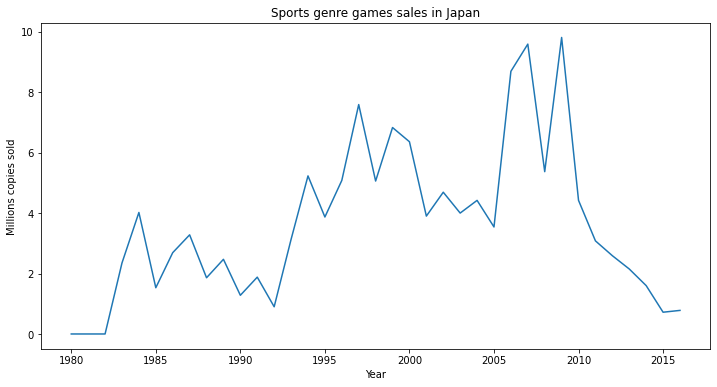

In [16]:
jp_sport_sales = df[df['Genre'] == 'Sports'].groupby('Year').sum()

fig, ax = plt.subplots(figsize=(12,6))

ax.plot(jp_sport_sales.index, jp_sport_sales.JP_Sales)
ax.set_title('Sports genre games sales in Japan')
ax.set_xlabel('Year')
ax.set_ylabel('Millions copies sold')

plt.show()

### Задача 2

В одних координатных осях постройте линейные графики динамики продаж студии "Activision" в Северной Америке, Европе, Японии и всем мире

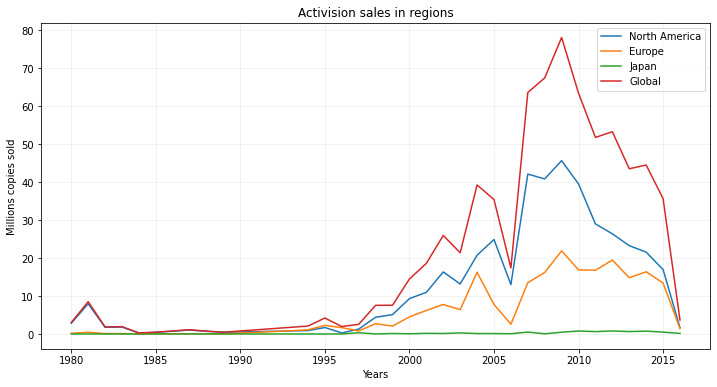

In [44]:
activision_sales = df[df['Publisher'] == 'Activision'].groupby('Year').sum()

fig, ax = plt.subplots(figsize=(12, 6))

ax.plot(activision_sales.index, activision_sales.NA_Sales, label='North America')
ax.plot(activision_sales.index, activision_sales.EU_Sales, label='Europe')
ax.plot(activision_sales.index, activision_sales.JP_Sales, label='Japan')
ax.plot(activision_sales.index, activision_sales.Global_Sales, label='Global')

ax.set_title('Activision sales in regions')
ax.set_xlabel('Years')
ax.set_ylabel('Millions copies sold')
ax.grid(alpha=0.2)

ax.legend()
plt.show()

### Задача 3

В цикле (т.е. на разных координатных осях) постройте линейные графики динамики продаж студии "Activision" в Северной Америке, Европе, Японии и всем мире

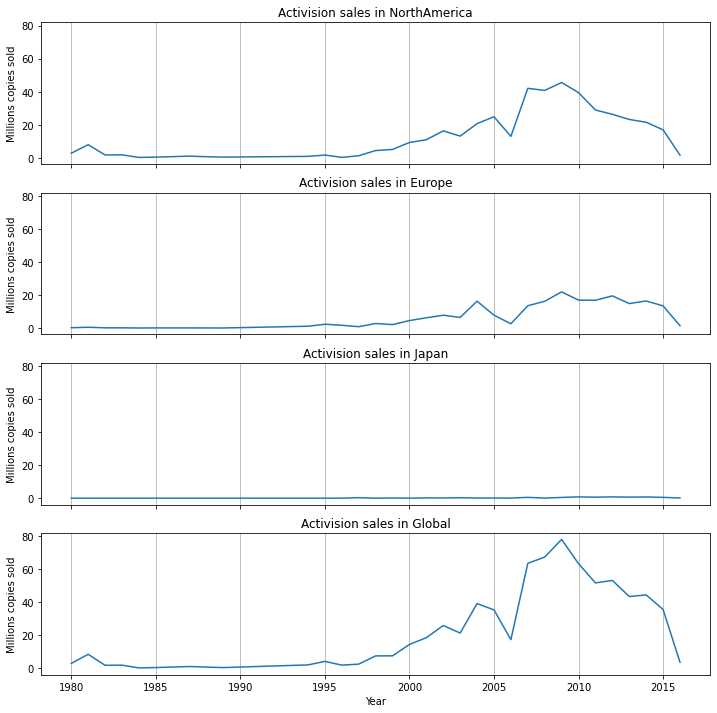

In [54]:
regions = [('NA_Sales', 'NorthAmerica'),
           ('EU_Sales', 'Europe'),
           ('JP_Sales', 'Japan'),
           ('Global_Sales', 'Global')]

fig, axs = plt.subplots(nrows=len(regions), ncols=1, sharex=True, sharey=True, figsize=(12, 12))

for index, region in enumerate(regions):
    ax = axs[index]
    ax.plot(activision_sales.index, activision_sales[region[0]])
    ax.set_title(f'Activision sales in {region[1]}')
    ax.set_ylabel('Millions copies sold')
    ax.grid(axis='x')

    if index == len(regions) - 1:
        ax.set_xlabel('Year')

plt.show()

### Задача 4

Постройте такие же линейные графики динамики продаж студии "Activision" в Северной Америке, Европе, Японии и всем мире на одном полотне в сетке 2 на 2 графика. Итоговое полотно сделайте размером 12 на 12. Все графики должны разделять оси X и Y

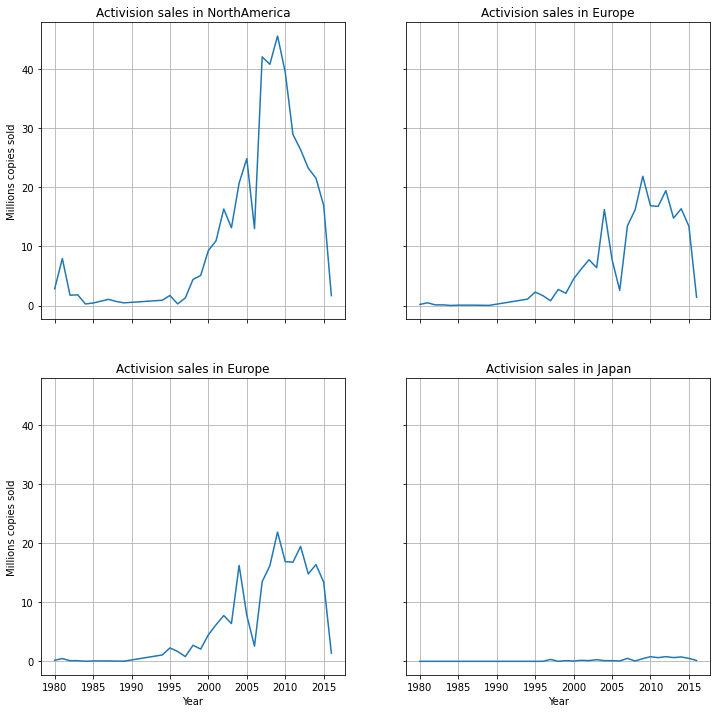

In [59]:
regions = [('NA_Sales', 'NorthAmerica'),
           ('EU_Sales', 'Europe'),
           ('JP_Sales', 'Japan'),
           ('Global_Sales', 'Global')]
n_cols = 2
n_rows = int(len(regions) / n_cols)

fig, axs = plt.subplots(nrows=n_rows, ncols=n_cols, sharex=True, sharey=True, figsize=(12, 12))

for row in range(n_rows):
    for col in range(n_cols):
        region = regions[row + col]
        ax = axs[row, col]
        ax.plot(activision_sales.index, activision_sales[region[0]])
        ax.set_title(f'Activision sales in {region[1]}')
        ax.grid()

        if col == 0:
            ax.set_ylabel('Millions copies sold')

        if row == n_rows - 1:
            ax.set_xlabel('Year')

plt.show()

### Задача 5

В одной координатной сетке постройте 2 гистограммы распределения мировых продаж игр издателей "Microsoft Game Studios" и "Take-Two Interactive" после 2010 года (включая 2010 год). Графики сделайте полупрозрачными, отсечки должны быть общими и соответствовать ширине столбцов обоих графиков

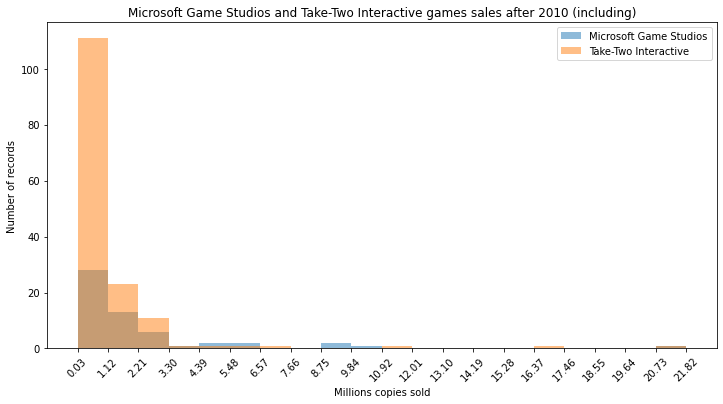

In [103]:
after_2010 = df[df['Year'] >= 2010]
microsoft_sales = after_2010[after_2010['Publisher'] == 'Microsoft Game Studios'].Global_Sales
taketwo_sales = after_2010[after_2010['Publisher'] == 'Take-Two Interactive'].Global_Sales

fig, ax = plt.subplots(figsize=(12, 6))

_, bins, _ = ax.hist(microsoft_sales, alpha=0.5, bins=20, label='Microsoft Game Studios')
ax.hist(taketwo_sales, alpha=0.5, bins=bins, label='Take-Two Interactive')

ax.set_xticks(bins)
ax.tick_params(axis='x', rotation=45)

ax.set_title('Microsoft Game Studios and Take-Two Interactive games sales after 2010 (including)')
ax.set_xlabel('Millions copies sold')
ax.set_ylabel('Number of records')

ax.legend()
plt.show()

### Задача 6

Определите 5 платформ, для которых в Японии было продано больше всего игр за все время. Проиллюстрируйте величину продаж на столбчатой диаграмме, столбец с самым высоким значением окрасьте зеленым, а с самым низким - красным

In [96]:
jp_top_sales = df.groupby('Platform').sum().sort_values('JP_Sales', ascending=False).head(5)
jp_top_sales

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Platform,,,,,,,
DS,20845831,4283493.0,390.71,194.65,175.57,60.53,822.49
PS,8322033,2375627.0,336.51,213.60,139.82,40.91,730.66
PS2,16159167,4263750.0,583.84,339.29,139.20,193.44,1255.64
SNES,1516804,476529.0,61.23,19.04,116.55,3.22,200.05
NES,186831,194741.0,125.94,21.15,98.65,5.31,251.07


In [99]:
jp_top_sales['Color'] = 'yellow'
jp_top_sales.iloc[0, -1] = 'green'
jp_top_sales.iloc[-1, -1] = 'red'

jp_top_sales

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Color
Platform,,,,,,,,
DS,20845831,4283493.0,390.71,194.65,175.57,60.53,822.49,green
PS,8322033,2375627.0,336.51,213.60,139.82,40.91,730.66,yellow
PS2,16159167,4263750.0,583.84,339.29,139.20,193.44,1255.64,yellow
SNES,1516804,476529.0,61.23,19.04,116.55,3.22,200.05,yellow
NES,186831,194741.0,125.94,21.15,98.65,5.31,251.07,red


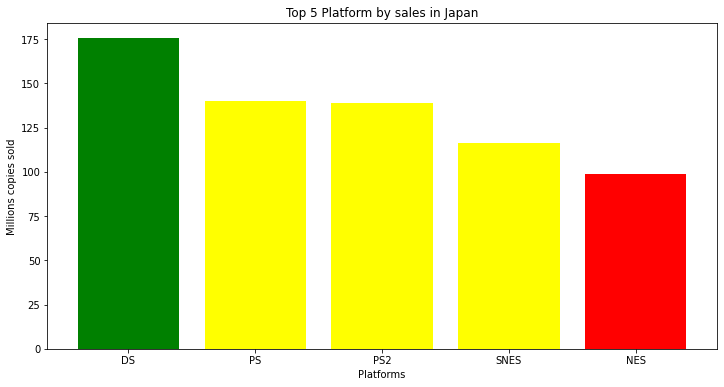

In [102]:
fig, ax = plt.subplots(figsize=(12, 6))

ax.bar(jp_top_sales.index, jp_top_sales.JP_Sales, color=jp_top_sales.Color)
ax.set_title('Top 5 Platform by sales in Japan')
ax.set_xlabel('Platforms')
ax.set_ylabel('Millions copies sold')

plt.show()

## Дополнительные (необязательные) задачи


### Задача 7

Постройте линейный график динамики количества игр, выпускаемых Nintendo, по годам. С помощью numpy или pandas определите промежуток, в который издатель каждый год выпускал больше 35 игр, и подсветите этот промежуток времени с помощью зеленого полупрозрачного прямоугольника

In [120]:
nintendo_games = df[df['Publisher'] == 'Nintendo'].groupby('Year').size().to_frame('Count').reset_index()
nintendo_games

,Year,Count
0,1983.0,6
1,1984.0,9
2,1985.0,7
3,1986.0,6
4,1987.0,4
5,1988.0,6
6,1989.0,9
7,1990.0,7
8,1991.0,13
9,1992.0,10


In [122]:
nintendo_games.Count

0      6
1      9
2      7
3      6
4      4
5      6
6      9
7      7
8     13
9     10
10     9
11     8
12    10
13    17
14    13
15    17
16    20
17    23
18    22
19    22
20    27
21    57
22    45
23    53
24    42
25    32
26    32
27    28
28    26
29    31
30    23
31    20
32    32
33    10
Name: Count, dtype: int64

In [123]:
high_indexes = np.argwhere(nintendo_games.Count.values > 35)
high_indexes

array([[21],
       [22],
       [23],
       [24]])

In [150]:
nintendo_games.Year.shape[0]

34

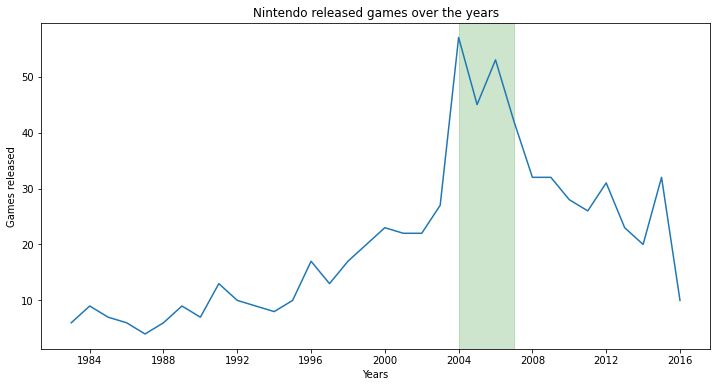

In [154]:
from matplotlib.ticker import MaxNLocator

fig, ax = plt.subplots(figsize=(12,6))

ax.plot(nintendo_games.Year, nintendo_games.Count)
ax.axvspan(xmin=nintendo_games.Year[high_indexes.min()],
           xmax=nintendo_games.Year[high_indexes.max()],
           color='green',
           alpha=0.2)

ax.set_title('Nintendo released games over the years')
ax.set_xlabel('Years')
ax.set_ylabel('Games released')

ax.xaxis.set_major_locator(MaxNLocator(10))

plt.show()

### Задача 8

Определите 3 жанра и 4 издателя с самыми большими продажами игр в мире за все время. Постройте сетку графиков 4 на 3, в каждой ячейке постройте точечный график, проверяющий зависимость общемировых продаж от продаж в Северной Америке для каждой пары (жанр, издатель). Размер итогового полотна определите самостоятельно таким образом, чтобы все графики были видны

In [171]:
top_genres = df.groupby('Genre')\
    .sum()\
    .sort_values('Global_Sales', ascending=False)['Global_Sales']\
    .head(3)
top_genres = top_genres.index.to_numpy()
top_genres

array(['Action', 'Sports', 'Shooter'], dtype=object)

In [172]:
top_publishers = df.groupby('Publisher')\
    .sum()\
    .sort_values('Global_Sales', ascending=False)['Global_Sales']\
    .head(4)
top_publishers = top_publishers.index.to_numpy()
top_publishers

array(['Nintendo', 'Electronic Arts', 'Activision',
       'Sony Computer Entertainment'], dtype=object)

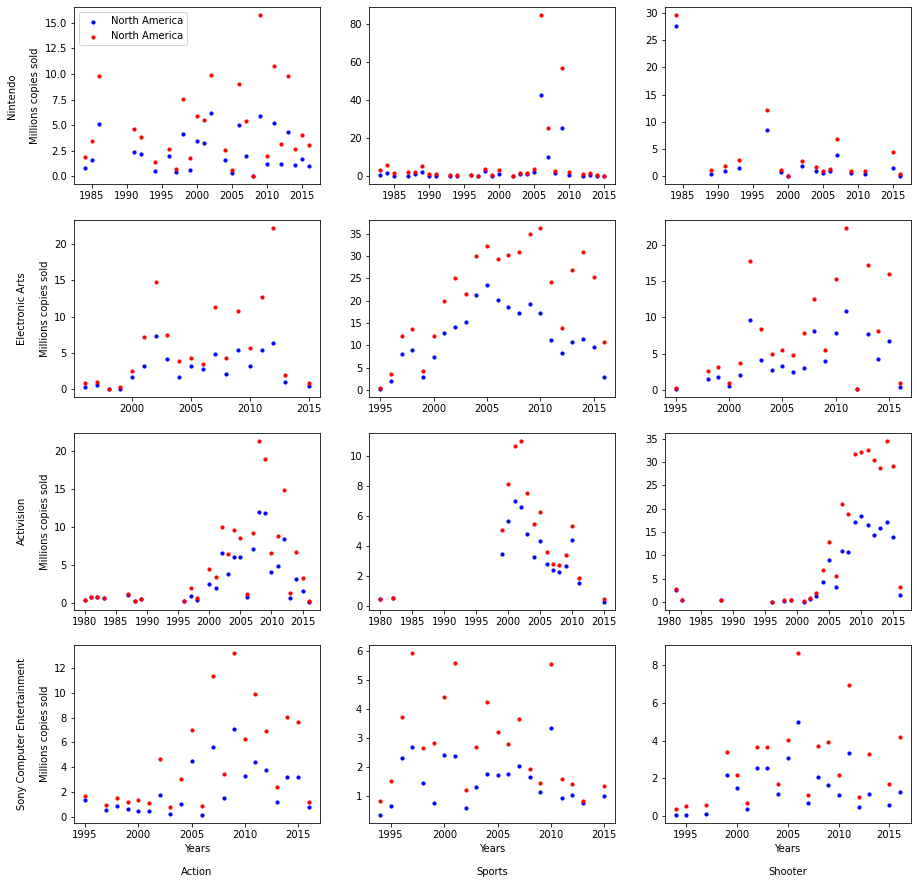

In [192]:
fig, axs = plt.subplots(nrows=top_publishers.shape[0],
                        ncols=top_genres.shape[0],
                        figsize=(15,15))


for i, publisher in enumerate(top_publishers):
    for j, genre in enumerate(top_genres):
        ax = axs[i, j]
        data = df[(df['Publisher'] == publisher) & (df['Genre'] == genre)].groupby('Year').sum()
        ax.scatter(data.index, data.NA_Sales, s=10, c='blue', label='North America')
        ax.scatter(data.index, data.Global_Sales, s=10, c='red', label='North America')

        if j == 0:
            ax.set_ylabel(f'{publisher}\n\nMillions copies sold')

        if i == top_publishers.shape[0] - 1:
            ax.set_xlabel(f'Years\n\n{genre}')

        if i == 0 and j == 0:
            ax.legend()

plt.show()